Solution of Ordinary Differential Equations
-------------------------------------------

Ordinary differential equations (or ODEs) are very common abstractions, useful in many different types of scientific models and
engineering applications.  An ODE is simply an equation containing a function of one independent variable and its derivatives.
The independent variable is typically something like time, and all dependent variabels, like location, are functions solely of that one independent parameter.
The derivative(s) of a function describes the instanteous rate of change of the function (or acceleration or other higher 
derivatives).  This is often the most direct way of describing the behavior of a system, by measuring and classifying the
rate of change as some function of the parameters.

For example, the simplest type of ODE is a first-order equation with one dependent variable (like $x$, maybe the position of
an object in space) and one independent variable, time or $t$ in this case:

$
\frac{\mathrm{d}x}{\mathrm{d}t} = \frac{2x}{t}
$

Notice here that we are saying that the rate of change of the dependent variable $x$, ant any point in time $t$ is calculated by
the expression $\frac{2x}{t}$.  Thus the rate of how fast $x$ will be changing at any time $t$ can be exactly calculated from
this equation.

This previous equation, however, can be solved exactly by hand by separating the variables.  There is no need to use a
computer to solve the equation in this case.  But suppose instead that we have a nonlinear equation:

$\frac{\mathrm{d}x}{\mathrm{d}t} = \frac{2x}{t} + \frac{3x^2}{t^3}$

Now the equation is no longer separable and as we said it is nonlinear, meaning that powers or other nonlinear functions of
the dependent variable $x$ appear in the equation.  Nonlinear equations can rarely be solved analytically, but they can be
solved numerically.  Computers don't care whether a differential equation is linear or nonlinear, the techniques used to solve
them numerically on a computer will be the same either way.


The general form of a first-order one-variable ordinary differential equation is

$\frac{\mathrm{d}x}{\mathrm{d}t} = f(x,t)$

where $f(x,t)$ is some function of variables $x$ and $t$ that we specify.  The independent variable is denoted $t$ in this
example, but other things or variables can also be used as the independent variable in an ODE.  For example, if $x$ is
the independent variable, and $y$ is our dependent variable, we would have an ODE in the form of

$\frac{\mathrm{d}y}{\mathrm{d}x} = f(x,y)$

Notice that the important thing for determining which variable is the independent variable is through the bottom part of the 
of the $\frac{\mathrm{d}y}{\mathrm{d}x}$ symbol, which can be read in this case as the instantaneous rate of change of $y$
(the dependent variable) varies as a function of $x$ (the independent variable).

To numerically calculate a full solution of an ODE of one variable in the standard form, we also need to have an initial condition
specified.  The reason for this is similar to why we need an $x_0$ value when calculating a sequence from a difference
equation.  We have to specify the value of the dependent variable for one particular value of the independent variable.  For
instance when using $t$ as our independent variable we will normally specify the initial condition of the system when $t=0$.

Euler's Method
--------------

Suppose we are given a one-variable ODE in the general form we just discussed, and an initial condition that fixes the 
value of $x$ for some time $t$.  Then we can use our old friend, the 
[Taylor expansion](http://en.wikipedia.org/wiki/Taylor_series), to write the value of $x$ a short interval $h$ 
later after the current time $t$, like this:

$x(t + h) = x(t) + h\frac{\mathrm{d}x}{\mathrm{d}t} + \frac{1}{2}h^2 \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + ... \\
\;\;\;\;\;\;\;\;\;\;\;\; = x(t) + h f(x,t) + O(h^2)$

Where we have used the general form to substitute the value of the derivative $\frac{\mathrm{d}x}{\mathrm{d}t}$ for 
the value of our ODE function that we are trying to approximate $f(x,t)$, and $O(h^2)$ is shorthand for
terms that go as $h^2$ or higher. If $h$ is small, then $h^2$ is very small, and so we can neglect the terms 
in $h^2$ and get

$x(t+h) = x(t) + h f(x,t)$

In english, what we are basically saying is that the value of the function at a small intervall away from $t$,
$t+h$ can be approximated by adding the current value of $x$ at time $t$ with a small increment $h f(x,t)$.  The
small increment works to approximate the value of $x$ a small distance away, because the derivative, which
is given by the $f(x,t)$ function, is a measure of the slope, or the rate of change of the function at
time $t$.  

Another way to derive Euler's method is to use the finite difference formula for the derivative, which may be
more familiar to some of you.  Recall that the derivative at point $t$ can be approximated using the finite
difference a small bit later $h$ like this

$\frac{\mathrm{d}x}{\mathrm{d}t} \approx \frac{x(t+h) - x(t)}{h}$

Substituting the ODE expression we have for the derivative $\frac{\mathrm{d}x}{\mathrm{d}t}$, and solving for
$x(t+h)$ will yield the same result as the taylor method to approximate the value of the system a short
interval $h$ from $t$.  Though the Taylor expansion method is more useful in computing, because it gives
us an estimate of the amount of error we will have in our approximation, as a value of our step size $h$.

So, if we know the value of $x$ at time $t$, we can use this approximation to calculate the value a short time later.
Then we can just repeat this exercise to calculate $x$ another interval $h$ after that, and so forth, and thereby
calculate $x$ at a succession of evenly spaced points for as long as we want.  We don't get $x(t)$ for all values
of $t$ from this numerical approximation, only a finite set of points.  But if $h$ is small enough we can get
a pretty good picture of what the solution to the equation looks like.  In fact, whenever you plot a function
in Python, you are basically doing a similar thing.  We don't calculate the value of the function we wish to
visualize at an infinite number of points.  But if we choose a small enough step size, we will be able to
accurately represent the shape of the function/curve over the given interval.

This approximation to the solution of an ODE is known as [Euler's method](http://en.wikipedia.org/wiki/Euler_method), 
after its inventor  Leonhard Euler.  Recall that we have actually used this
method before, in Part B of our sequences and difference equations lecture notebook, to estimate the shape
of the Lotke-Voltara ODE equation for the coupled predator-prey population dynamics.  

Thus, for instance, we might be given a differential equation for $x$ and an initial condition at $t = a$ and 
asked to make a graph of $x(t)$ for values of $t$ from $a$ to $b$.  To do this, we would divide the interval
from $a$ to $b$ into steps of size $h$ and use Euler's method to repeatedly calculate $x(t)$ for successive
increments of $h$, and then plot the results.

Let's use Euler's method to solve the differential equation

$\frac{\mathrm{d}x}{\mathrm{d}t} = -x^3 + sin(t)$

with the initial condition $x=0$ at $t=0$ (e.g. $x_0 = 0$).  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

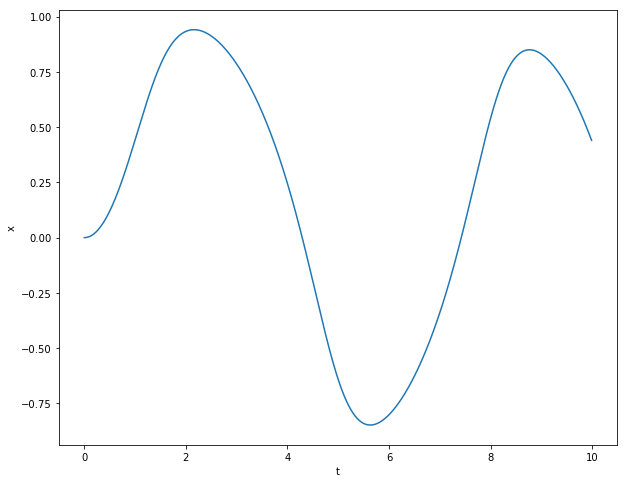

In [2]:
def f(x, t):
    """The ODE we will solve, where t is the independent variable
    and x is the dependent variable.  This equation is basically
    an expression for the rate of change of the dependent variable x
    given the value of x and the current time t"""
    return -x**3.0 + np.sin(t)

a = 0.0       # start of the interval
b = 10.0       # end of the interval
N = 1000      # number of steps
h = (b-a) / N # size of single step

tpoints = np.arange(a, b, h) # the time points we calculate x at
xpoints = np.zeros(N)        # array to hold result of numerically approximating our ODE
x = 0.0                      # initial condition, at t=0 x(t) = 0

# approximate solution to f(x,t) ODE
for ti, t in enumerate(tpoints):
    xpoints[ti] = x
    x = x + h * f(x,t)
    
# visualize resulting approximation
plt.figure(figsize=(10,8))
plt.plot(tpoints, xpoints)
plt.xlabel('t')
plt.ylabel('x')

pass

For convenience in later discussions, lets turn the previous code into a function that can calculate the Euler approximation
to any general ODE of the form $f(x,t)$.  We will use something more like our sequence/series solutions, and also create
and return solutions as numpy arrays.

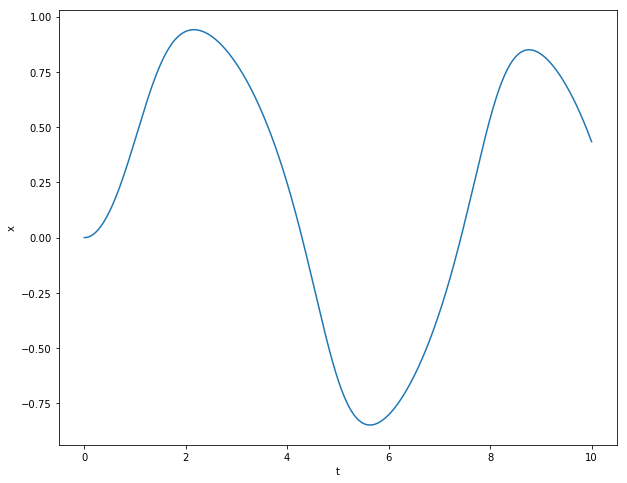

In [3]:
def ode_euler_method(f, a, b, h, x0):
    """Calculate approximate solution to an ODE using Euler's Method.  We will approximate the
    solution to the ODE defined by function f, over the inverval from a to b.  We will use h
    as the step size of successive approximations.  The initial condition for x(t0) is given by x0.
    
    Parameters
    ----------
    f - A python function of the form f(x,t).  This defines the expression for the ODE rate of change
          of the dependent variable x as a function of x and the independent variable t
    a,b - Scalar float values, the begin and end points of the interval to approximate the solution for.
    h - The step size
    x0 - The initial condition, the value of x at t0 in our ODE system.
    
    Returns
    -------
    t - a numpy array of the time values, these will be times ranging from a to b in increments of time step h
    x - The approximation of the solution of the dependent variable x given the ODE expression for its derivative
        and the initial condition.
    """
    # we will return result as 2 numpy arrays, the t (time independent variable) and x (dependent variable)
    t = np.arange(a, b+h, h)
    N = t.shape[0]
    x = np.zeros(N)
    x[0] = x0
    
    for i in range(1,N):
        tp = t[i-1]
        xp = x[i-1]
        x[i] = xp + h * f(xp, tp)
        
    return (t, x)

# test it with our previous function
a = 0.0       
b = 10.0
h = 0.01
x0 = 0.0
t, x = ode_euler_method(f, a, b, h, x0)

plt.figure(figsize=(10,8))
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')

pass

Lets look at the performance of our Euler approximation to the solution a little closer, by comparing the result for an ODE
that has a known exact solution.  For the following ODE:

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x, \;\;\;\; x(0) = 1
$$

The known exact solution  is ([video](https://www.khanacademy.org/math/differential-calculus/taking-derivatives/der_common_functions/v/proof-d-dx-e-x-e-x): proof $\frac{\mathrm{d}}{\mathrm{dt}}e^t = e^t$

$x = e^t$

This solution says that we know the value of $x$ at any time $t$ will be exactly $e^t$, because this solution satisfies the ODE relationship that says that the derivative should be equal to $x$.  This exact solution allows us to calculate the exact value of $x$ at any given time $t$, and the curve will conform to the ODE
expression in the sense that the rate of change at each time $t$ will always be exactly $x$, as the ODE expression 
dictates.

Lets plot the exact solution of the equation:

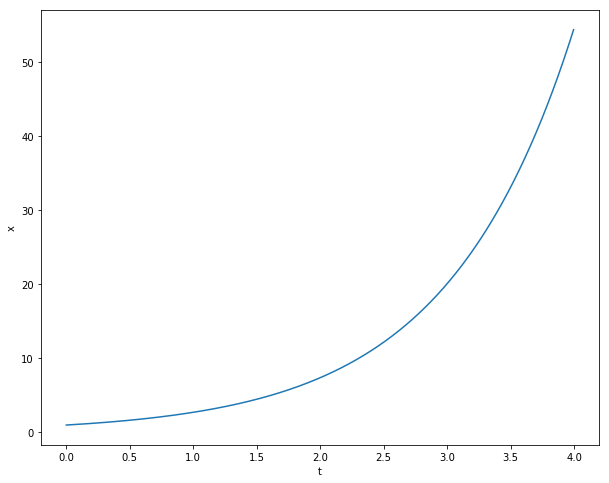

In [4]:
def sol(t):
    return np.exp(t)

a = 0.0
b = 4.0
N = 1000
h = (b - a) / N
t = np.arange(a, b, h)
x_sol = sol(t)

plt.figure(figsize=(10,8))
plt.plot(t, x_sol)
plt.xlabel('t')
plt.ylabel('x')

pass

Now we will compare the exact solution, to the euler approximation.  Lets use step size of 1, 0.1 and 0.01 to see the result 
on the approximation error as we decrease the step size.

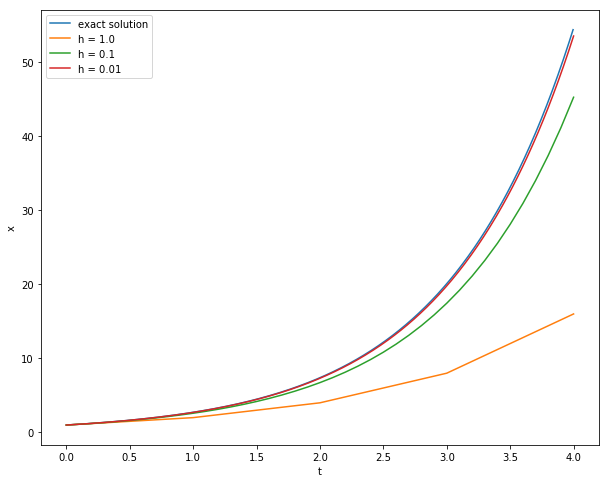

In [5]:
def f(x, t):
    return x

# calculate approximations for h = 1, 0.1 and 0.01
a = 0.0
b = 4.0 
x0 = 1.0

h = 1.0
t_h1, x_h1 = ode_euler_method(f, a, b, h, x0)

h=0.1
t_h2, x_h2 = ode_euler_method(f, a, b, h, x0)

h=0.01
t_h3, x_h3 = ode_euler_method(f, a, b, h, x0)


# visualize results
plt.figure(figsize=(10,8))

plt.plot(t, x_sol, label='exact solution')
plt.plot(t_h1, x_h1, label='h = 1.0')
plt.plot(t_h2, x_h2, label='h = 0.1')
plt.plot(t_h3, x_h3, label='h = 0.01')

plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc=2)

pass

So you should reach two conclusions from this example.  First of all, the approximation (for small enough step sizes of h) is
giving us an accurate representation of this ODE, as shown by the fact that for $h=0.01$ our approximation is fairly close
to the exact known solution.  Secondly, as you would expect from our Taylor expansion derivation of Euler's approximation,
as we decrease the step size, our approximation of the ODE solution decreases its error.

In general, Euler's method is not bad.  It gives reasonable answers in many cases.  In practice, however, Euler's method is
never used.  This is because there is a better method that only requires very little extra work to program and that
is much more accurate, and it runs as fast and often faster as Euler's method.  This other method is the so called
Runge-Kutta method, which we will look at in Part B of our notebooks on ODE solutions.

But quickly, lets analyze the error that Euler's approximation to the solution is likely to be producing.  As you saw, 
Euler's method is a first-order approximation, we neglect the $h^2$ and higher-order terms.  The size of the $h^2$
term is $\frac{1}{2} h^2 d^2x / dt^2$, which tell us the error introduced on a single estimation step of the method.

But we don't just take a single step when we use Euler's method to approximate the solution to an ODE.  In fact, we take many
steps, and the smaller we need $h$ to be in order to increase the accuracy of our approximation for a single step, the
more steps we will need to calculate to approximate the solution for a given range.  If we want to calculate
a solution from $t = a$ to $t = b$ using steps of size $h$ then the total number of steps we need to take is
$N = (b - a) / h$.  If you sum up the individual errors on each step, it turns out that the total error will be
linear in $h$, even though the individual errors are of order $h^2$.  This means the error goes down by a factor of
2 each time we make $h$ half as large.  In principle, then, we can still make the error as small as we like, even
though when we make $h$ smaller we are also increasing the number of steps $N$.  Of course, each doubling of
accuracy also requires calculating twice as many steps, so the calculation will double in time to calculate.

If there wasn't a better way, we could work with this and use the Euler's method.  However the Runge-Kutta method
can do much better.

Runge - Kutta Method
--------------------

A first thought to improve on Euler's method would be to keep using the Taylor expansion but keep higher order terms.  This would
give us more accurate expressions for $x(t + h)$ but in a lot of cases it will not work.  It requires us to know the derivative
$df / dt$ which we can calculate only if we have an explicit experssion for $f$ that can be manipulated analytically.  Often
we don't have such an expression, for example we might simply have empirical data collected from some experiment.  And even if
$f$ is known explicitly, calculating the derivatives can be inconvenient, even when possible. The Runge-Kutta method gives
higher accuracy and doesn't require any derivatives.

The Runge-Kutta method is really a set of methods, there are many of them of different orders, which give results of
varying degrees of accuracy.  In fact technically Euler's method is a Runge-Kutta method.  It is the first-order
Runge-Kutta method.  Let us look at the next method in the series, the second-order method, also sometimes called the
*midpoint method*, for reasons that will shortly become clear.

Euler's method can be represented in graphical fashon as shown in the following figure.

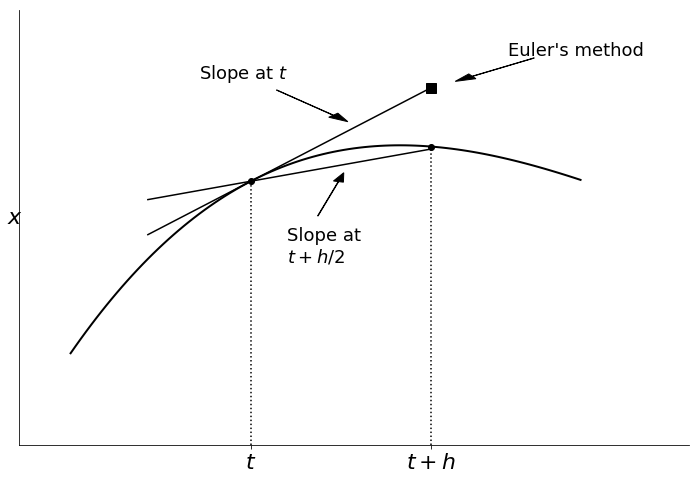

In [6]:
# some function and its derivative, only for illustration
def f(x):
    return x**3.0 - 3.5 * x**2.0 + 3.25 * x - 6

def dfdx(x):
    return 3.0 * x**2.0 - 7.0 * x + 3.25

x = np.arange(0.0, 1.0, 0.01)

# plot the function
plt.figure(figsize=(12, 8))
plt.plot(x, f(x), 'k-', linewidth=2)

# label the figure
ax = plt.gca()
t = 0.35
h = 0.35
t_plus_h = t + h

# set tick/axis labels
plt.xticks([t, t_plus_h])
ax.set_xticklabels(['$t$', '$t + h$'], fontsize=22)
plt.yticks([])
plt.ylabel('$x$', fontsize=22, rotation='horizontal')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# add notation to figure
plt.plot(t, f(t), 'ko')
plt.plot([t, t], [-6.4, f(t)], 'k:')
plt.plot(t_plus_h, f(t_plus_h), 'ko')
plt.plot([t_plus_h, t_plus_h], [-6.4, f(t_plus_h)], 'k:')

# plot the slope at t, use point/slope formula to plot
m = dfdx(t)
x = np.array([t-0.2, t, t_plus_h])
y = m * (x - t) + f(t)
plt.plot(x, y, 'k-')
plt.text(0.25, -4.8, "Slope at $t$", fontsize=18)
plt.arrow(0.4, -4.85, 0.11, -0.11, head_width=0.025, head_length=0.04, color='black')
# note location of Euler's method estimation at f(t + h)
plt.text(0.85, -4.7, "Euler's method", fontsize=18)
plt.plot(x[-1], y[-1], 'ks', markersize=10)
plt.arrow(0.9, -4.71, -0.12, -0.08, head_width=0.025, head_length=0.04, color='black')

# plot the slope at the midpoint t + h/2
m = dfdx(t + h/2.0) # t + h/2, h = 0.35
x = np.array([t-0.2, t, t_plus_h])
y = m * (x - t) + f(t)
plt.plot(x, y, 'k-')
plt.text(0.42, -5.6, "Slope at\n$t + h/2$", fontsize=18)
plt.arrow(0.48, -5.4, 0.04, 0.15, head_width=0.02, head_length=0.04, color='black')

# set axis limits, so can see figure better
plt.axis([-0.1, 1.2, -6.4, -4.5])

pass

The curve represents the true form of $x(t)$ we are trying to calculate.  The differential equation $dx / dt = f(x, t)$ tells
us the slope of the solution is equal to the function $f(x, t)$, so that given the value of $x$ at time $t$ we can calculate
the slope at that point, as shown in the figure.  Then we extrapolate the slope to time $t + h$ and it gives us an estimate
of the value of $x(t + h)$, which is labeled "Euler's method" in the figure.  If the curve of $x(t)$ were in fact a straight
line between $t$ and $t + h$, then this method would give a perfect estimate of $x(t + h)$.  But if the function is curved, as
in the picture, then the estimate is only approximate, and the error introduced is the difference between the estimate and the
true value of $x(t + h)$

No suppose we do the same calculation that we did using the simple Euler's method, but instead of using the slope at $t$ we
use the slope at the midpoint between $t$ and $t + h$, e.g. the slope at point $t + h/2$.  If the function is curved, then
using this slope (which is much closer to the point $t + h$ we are estimating), will usually give a much better approximation.
As we show in the figure, the second line is extrapolated using the slope at the midpoint, and in this case gives an
approximation much closer to true value.  And notice that even in the cases where the function is mostly linear, this approximation
using the midpoint will almost never be worse than using the slope at the point $t$ as in the Euler's method, and is often
a much better approximation.

If we extrapolate using the slope at the midpoint we get a different estimate of $x(t + h)$ which is usually significantly better
than Euler's method.  This is the basis of the second-order Runge-Kutta Method.  Mathematically we do this by performing
a Taylor expansion around $t + \frac{1}{2} h$ to get the value of $x(t + h)$ thus:

$$
x(t + h) = x(t + \frac{1}{2}h) + \frac{1}{2}h \Big( \frac{dx}{dt} \Big)_{t + \frac{1}{2}h} + \frac{1}{8} h^2 \Big( \frac{d^2x}{dt^2} \Big)_{t + \frac{1}{2}h} + O(h^3)
$$

Similarly we can derive an expression for $x(t)$ by going backward one half of an h step:

$$
x(t + h) = x(t + \frac{1}{2}h) - \frac{1}{2}h \Big( \frac{dx}{dt} \Big)_{t + \frac{1}{2}h} + \frac{1}{8} h^2 \Big( \frac{d^2x}{dt^2} \Big)_{t + \frac{1}{2}h} + O(h^3)
$$


Subtracting the second expression from the first and rearranging causes the $x(t + \frac{1}{2}h$ and $h^2$ terms to 
disappear, giving:

$$
x(t + h) = x(t) + h \Big( \frac{dx}{dt} \Big)_{t + \frac{1}{2}h} + O(h^3) \\
         = x(t) + h f(x(t + \frac{1}{2}h), t + \frac{1}{2}h) + O(h^3)
$$

Again as in previous lectures, if you don't completely follow the algebra here that is ok.  However, make sure you understand
the implications of this final form.  Here we are basically saying that the value of the function at $x(t + h)$ can be
computed by adding to the value at $x(t)$ h times the slope or rate of change that we calculate at the midpoint (as shown
in the figure) plus some error that is of order $h^3$.  The important part is the $O(h^3)$ part, which is a whole order
of magnitude better than the firs-order Euler approximation.  This implies that the second-order Runge-Kutra
approximation will be a significantly better estimate of the location of the function at $t + h$.

Though this looks promising there is one problem.  By definition for our ordinary differential equation, we have
an expression $f(x, t)$ which we can use to find what the slope of our system is at any time $t$ and point $x$.  This is what the
second part of the previous equation is stating.  However, to calculate the slope at the midpoint using our ODE
function $f(x, t)$, we know what $t$ value we want, $t + h$.  However, we don't know what the value of $x$ is at
$x(t + \frac{1}{2}h)$, we only know the value at $x(t)$.  For the Runge-Kutra methods, we get around this by
approximating this value using Euler's method $x(t + \frac{1}{2}h) = x(t) + \frac{1}{2}h f(x, t)$, and then substituting
this value of $x$ into the equation above.  The complete calculation for a single step in the approximation for the
second-order Runge-Kutra method is thus:

**Eq 9.1a  (Second-Order Runga-Kutta Method)**
$$
k_1 = h f(x, t)
$$

**Eq 9.1b**
$$
k_2 = h f(x + \frac{1}{2} k_1, t + \frac{1}{2} h)
$$

**Eq 9.1c**
$$
x(t + h) = x(t) + k_2
$$

The first equation 9.1a is basically the value we used in Euler's method to estimate the location of the function at $x(t + h)$.
We use $\frac{1}{2}$ of this value to estimate the location at $x(t + \frac{1}{2}h)$ in equation 9.1b.  In other words, 
equation 9.1a is giving us an estimate of $x$ at $\frac{1}{2}$ the step size $h$, the location of the midpoint we need
for our midpoint method.  From there, assuming that the estimate of the midpoint location is good enough, we use the previous
result to get the slope at this midpoint, then calculate the location at $x(t + h)$ using this second-order slope.

Equations 9.1a - 9.1c are the equations for the second-order Runge-Kutta method.  As for the methods we looked at for
calculating the integral, a "second-order" method, in this context, is a method *accurate* to order $h^2$, meaning
that the *error* is of order $h^3$.  Euler's method, by contrast, is a first-order method with an error of
order $h^2$.  Note that as we talked about with Euler's method, these error estimates refer to just a single step
of each differential equation calculation.  Real calculations involved doing many steps one after another, with errors
that are accumulating, so that the accuracy of the final calculation is poorer (typically one order in $h$ poorer).

The second order Runge-Kutta method is only a little more complicated to program than Euler's method, but gives much more
accurate results for any given value of $h$.  Or, alternatively, we could make $h$ bigger and so take fewer steps while
still getting comporable accuracy as Euler's method, thus creating a program that achieves the same results with much
less calculation needed.

One further note, since we actually approximated the value at $x(t + \frac{1}{2}h)$, we are not sure that this additional
source of error doesn't actually overwhelm the improvement that using the slope at the midpoint grants to the overall
error.  So does this extra source of error, coming from this second approximation, add enough additional error to negate
the benefits and accuracy achieved from using the slope at the midpoint?  It can be shown that in fact this is not
a problem (though we will not derive this here).  The error introduced by approximating the midpoint location goes
like $h^3$, and thus does not significantly affect the error overall of the second-order Runge-Kutta method.

Let us create a function to implement a second-order Runge-Kutta method as before, and compare its performance to the
first-order Euler's method.  We will use the same function as in a previous example, and compare the accuracy of two
as we decrease the step size $h$.

In [7]:
def f(x, t):
    """The ODE we will solve, where t is the independent variable
    and x is the dependent variable.  This equation is basically
    an expression for the rate of change of the dependent variable x
    given the value of x and the current time t"""
    return -x**3.0 + np.sin(t)


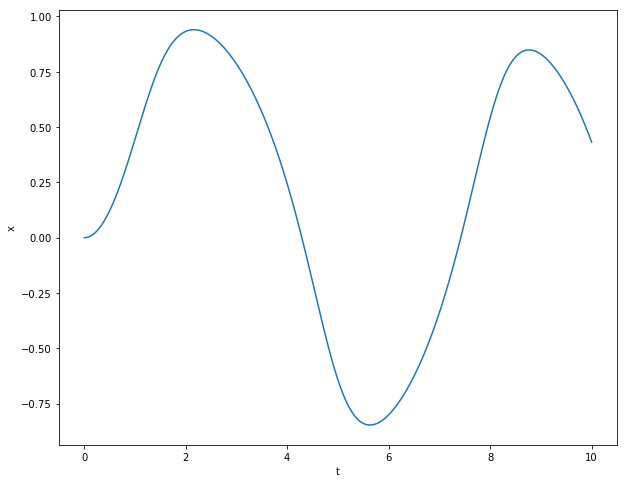

In [8]:
def ode_runge_kutta_second_order_method(f, a, b, h, x0):
    """Calculate approximate solution to an ODE using a second-order Runge-Kutta approximation.  We
    will approximate the solution to the ODE defined by function f, over the inverval from a to b.  We
    will use h as the step size of successive approximations.  The initial condition for x(t0) is given by x0.
    
    Parameters
    ----------
    f - A python function of the form f(x,t).  This defines the expression for the ODE rate of change
          of the dependent variable x as a function of x and the independent variable t
    a,b - Scalar float values, the begin and end points of the interval to approximate the solution for.
    h - The step size
    x0 - The initial condition, the value of x at t0 in our ODE system.
    
    Returns
    -------
    t - a numpy array of the time values, these will be times ranging from a to b in increments of time step h
    x - The approximation of the solution of the dependent variable x given the ODE expression for its derivative
        and the initial condition.
    """
    # we will return result as 2 numpy arrays, the t (time independent variable) and x (dependent variable)
    t = np.arange(a, b+h, h)
    N = t.shape[0]
    x = np.zeros(N)
    x[0] = x0
    
    for i in range(1,N):
        # the previous time step and calculation of x
        tp = t[i-1]
        xp = x[i-1]

        # second-order Runge-Kutta approximation
        k1 = h * f(xp, tp)
        k2 = h * f(xp + 0.5 * k1, tp + 0.5 * h)
        x[i] = xp + k2
                
    return (t, x)

# test it with our previous function
a = 0.0       
b = 10.0
h = 0.01
x0 = 0.0
t, x = ode_runge_kutta_second_order_method(f, a, b, h, x0)

plt.figure(figsize=(10,8))
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')

pass

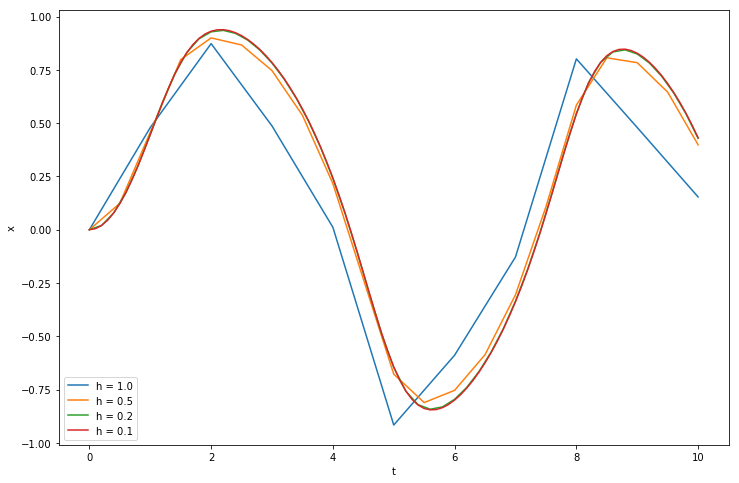

In [9]:
# look at approximation as h decreases
a = 0.0       
b = 10.0
h_vals = [1.0, 0.5, 0.2, 0.1]
x0 = 0.0

plt.figure(figsize=(12,8))
for h in h_vals:
    t, x = ode_runge_kutta_second_order_method(f, a, b, h, x0)
    lbl = "h = %0.1f" % h
    plt.plot(t, x, label=lbl)

plt.legend(loc=3)
plt.xlabel('t')
plt.ylabel('x')

pass

If we do the second-order Runge-Kutta approximation with different values of $h$ and plot the results, we get our second figure
example above.  This figure shows that the solution for $h = 1.0$ is quite poor, as is $h = 0.5$.  But the solutions
for $h = 0.2$ and above look very similar and relatively smooth (at this resolution) indicating that the method has
converged to a result close to the true solution.  

Also, we can compare the second-order method to the performance of the first-order Euler's method.  For example:



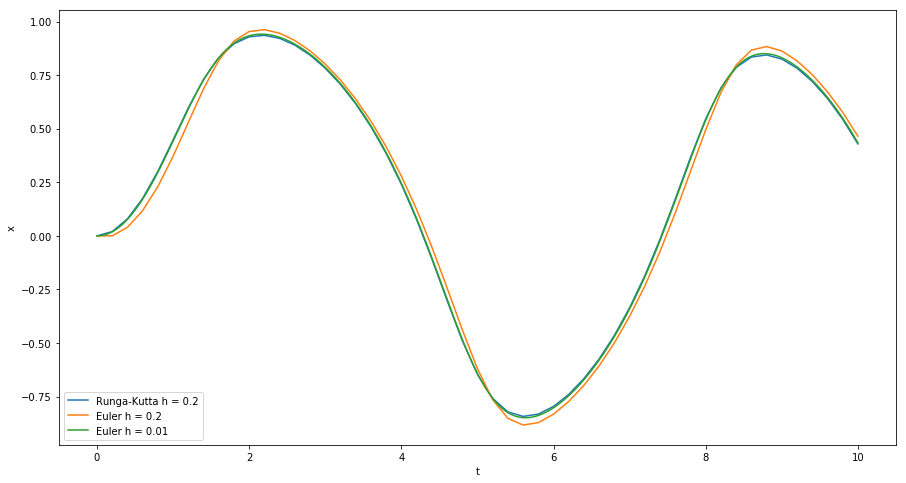

In [10]:
a = 0.0       
b = 10.0
h = 0.2
x0 = 0.0

plt.figure(figsize=(15,8))

t, x = ode_runge_kutta_second_order_method(f, a, b, h, x0)
lbl = "Runga-Kutta h = %0.1f" % h
plt.plot(t, x, label=lbl)

t, x = ode_euler_method(f, a, b, h, x0)
lbl = "Euler h = %0.1f" % h
plt.plot(t, x, label=lbl)

h = 0.01
t, x = ode_euler_method(f, a, b, h, x0)
lbl = "Euler h = %0.2f" % h
plt.plot(t, x, label=lbl)

plt.legend(loc=3)
#plt.axis([9.5, 10, 0.4, 0.75])
plt.xlabel('t')
plt.ylabel('x')

pass

This last figure shows that there is close agreement for $h = 0.2$ for the second-order method, with the Euler first-order
approximation using 20 times more points in the approximation.  You might want to try zooming in on the previous figure, for
example looking only at the result from time $t=9$ to $t=10$ to get a better feel for the closeness of the different
methods and approximations.

Fourth-Order Runge-Kutta Method
-------------------------------

We can take this approach further.  By performing Taylor expansions around various points and then taking the right
linear combinations of them, we can arrange for terms in $h^3$, $h^4$ and so on to cancel out of our expressions, and so get
more accurate rules for solving differential equations.  The donwside is that the equations become more complicated as we go
to higher order.  Many people feel, however, that the sweet spot is the fourth-order rule, which offers a good balance
of high accuracy and equations that are still relatively simple to program.  The fourth-order equations look like this:

**Eq 9.2a  (Fourth-Order Runga-Kutta Method)**
$$
k_1 = h f(x, t)
$$

**Eq 9.2b**
$$
k_2 = h f(x + \frac{1}{2} k_1, t + \frac{1}{2} h)
$$

**Eq 9.2c**
$$
k_3 = h f(x + \frac{1}{2} k_2, t + \frac{1}{2} h)
$$

**Eq 9.2d**
$$
k_4 = h f(x + k_3, t + h)
$$

**Eq 9.2e**
$$
x(t + h) = x(t) + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$


This is the *fourth-order Runge-Kutta method*, and it is by far the most common method for the numerical solution of ordinary
differential equations.  It is accurate to terms of order $h^4$ and carries an error on order of $h^5$.  Although its
derivation is quite tedious, the final equations are relatively simple.  There are just five of them, and yet the result
is a method that is three orders of $h$ more accurate than Euler's method for steps of the same size.  In practice this
can make the fourth-order method as much as a million times more accurate than Euler's method.  Or as mentioned before,
we can also instead use potentially much larger $h$ step sizes in our approximations, reducing significantly the amount
of calculation needed for some model.  For many professional computational scientists, the fourth-order Runge-Kutta
method is the first method they turn to when they want to solve an ordinary differential equation on the computer.  The
scipy standard ODE solver uses an adaptive fourth-order Runga-Kutta method as the default solver for ODE systems.

Lets implement an example of the fourth-order method as a function as before.  The following function is only a slight modification
of our solution for the second-order Runge-Kutta method:

In [11]:
def ode_runge_kutta_fourth_order_method(f, a, b, h, x0):
    """Calculate approximate solution to an ODE using a fourth-order Runge-Kutta approximation.  We
    will approximate the solution to the ODE defined by function f, over the inverval from a to b.  We
    will use h as the step size of successive approximations.  The initial condition for x(t0) is given by x0.
    
    Parameters
    ----------
    f - A python function of the form f(x,t).  This defines the expression for the ODE rate of change
          of the dependent variable x as a function of x and the independent variable t
    a,b - Scalar float values, the begin and end points of the interval to approximate the solution for.
    h - The step size
    x0 - The initial condition, the value of x at t0 in our ODE system.
    
    Returns
    -------
    t - a numpy array of the time values, these will be times ranging from a to b in increments of time step h
    x - The approximation of the solution of the dependent variable x given the ODE expression for its derivative
        and the initial condition.
    """
    # we will return result as 2 numpy arrays, the t (time independent variable) and x (dependent variable)
    t = np.arange(a, b+h, h)
    N = t.shape[0]
    x = np.zeros(N)
    x[0] = x0
    
    for i in range(1,N):
        # the previous time step and calculation of x
        tp = t[i-1]
        xp = x[i-1]

        # second-order Runge-Kutta approximation
        k1 = h * f(xp, tp)
        k2 = h * f(xp + 0.5*k1, tp + 0.5*h)
        k3 = h * f(xp + 0.5*k2, tp + 0.5*h)
        k4 = h * f(xp + k3, tp + h)
        x[i] = xp + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    
    return (t, x)

# test it with our previous function
a = 0.0       
b = 10.0
h = 0.1
x0 = 0.0
t, x = ode_runge_kutta_fourth_order_method(f, a, b, h, x0)

plt.figure(figsize=(10,8))
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')

pass

In [12]:
a = 0.0       
b = 10.0
h = 0.5
x0 = 0.0

plt.figure(figsize=(15,8))

t, x = ode_runge_kutta_fourth_order_method(f, a, b, h, x0)
lbl = "Runga-Kutta fourth-order h = %0.1f" % h
plt.plot(t, x, label=lbl)

t, x = ode_runge_kutta_second_order_method(f, a, b, h, x0)
lbl = "Runga-Kutta second-order h = %0.1f" % h
plt.plot(t, x, label=lbl)

h = 0.0005
t, x = ode_euler_method(f, a, b, h, x0)
lbl = "Euler h = %0.4f" % h
plt.plot(t, x, label=lbl)

plt.legend(loc=3)
#plt.axis([9.5, 10, 0.4, 0.75])
plt.xlabel('t')
plt.ylabel('x')

pass

In the second example, we compare the performance of the fourth-order Runga-Kutta method to the second and first order
approximations.  Notice that the fourth-order method is better approximating a Euler's approximation with 1000 times
the number of points used to calculate the approximation.

# Versions

In [13]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.13 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.3.0
OS Linux 4.13.0 32 generic x86_64 with debian stretch sid
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
Mon Feb 19 11:14:26 2018 CST

Acknowledgement
----------------

The content of this notebook are based upon and borrowed heavily from Newman "Computational Physics" Chapter 8.